<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Hands on Lab: Complete the Machine Learning Prediction lab


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [5]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [10]:
# First, import piplite
import piplite

# Install scipy using piplite
await piplite.install('scipy')

# Now you can import your libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

print("All packages imported successfully!")

All packages imported successfully!


We will import the following libraries for the lab


In [11]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [12]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot() 
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [13]:
from js import fetch
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = await fetch(URL1)
text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(text1)

In [14]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [42]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = await fetch(URL2)
text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
X = pd.read_csv(text2)

In [16]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [19]:
# Extract the 'Class' column as a Pandas Series and convert to NumPy array
Y = data['Class'].to_numpy()

# Verify the type and shape
print("Type of Y:", type(Y))
print("Shape of Y:", Y.shape)
print("First few values of Y:", Y[:5])

Type of Y: <class 'numpy.ndarray'>
Shape of Y: (90,)
First few values of Y: [0 0 0 0 0]


In [43]:
from js import fetch
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = await fetch(URL1)
text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(text1)

In [22]:
data.tail()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
85,86,2020-09-03,Falcon 9,15400.0,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1060,-80.603956,28.608058,1
86,87,2020-10-06,Falcon 9,15400.0,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1058,-80.603956,28.608058,1
87,88,2020-10-18,Falcon 9,15400.0,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,5,B1051,-80.603956,28.608058,1
88,89,2020-10-24,Falcon 9,15400.0,VLEO,CCAFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,2,B1060,-80.577366,28.561857,1
89,90,2020-11-05,Falcon 9,3681.0,MEO,CCAFS SLC 40,True ASDS,1,True,False,True,5e9e3032383ecb6bb234e7ca,5.0,0,B1062,-80.577366,28.561857,1


In [24]:
# Extract 'Class' column as a pandas Series
Y = pd.Series(data['Class'].to_numpy())

# Check output
print(type(Y))
print(Y.head())

<class 'pandas.core.series.Series'>
0    0
1    0
2    0
3    0
4    0
dtype: int64


## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Assume X and Y are already defined
# Step 1: Standardize X
scaler = StandardScaler()
X = scaler.fit_transform(X)   # reassign to X

# Step 2: Split into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=2
)

# Step 3: Split training again into train and validation
X_train2, X_val, Y_train2, Y_val = train_test_split(
    X_train, Y_train, test_size=0.25, random_state=2
) 
# (0.25 of 0.8 = 0.2, so test 20%, val 20%, train 60%)

# Step 4: Train using GridSearchCV
# Example: Logistic Regression
parameters = {'C':[0.01,0.1,1,10,100]}  # hyperparameters to tune
lr = LogisticRegression(max_iter=1000)

grid = GridSearchCV(lr, param_grid=parameters, cv=4)
grid.fit(X_train2, Y_train2)

# Best hyperparameters
print("Best parameters:", grid.best_params_)

# Accuracy on validation set
val_score = grid.score(X_val, Y_val)
print ("Validation Accuracy:",val_score)

Best parameters: {'C': 0.1}
Validation Accuracy: 0.8333333333333334


In [28]:
# students get this 
transform = preprocessing.StandardScaler()

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [32]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Print the shapes to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)
print("Training samples:", len(X_train))
print("Test samples:", len(X_test))

X_train shape: (72, 83)
X_test shape: (18, 83)
Y_train shape: (72,)
Y_test shape: (18,)
Training samples: 72
Test samples: 18


In [31]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and test (20%)
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=2
)

we can see we only have 18 test samples.


In [33]:
Y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [34]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [37]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create a logistic regression object
logreg = LogisticRegression(solver='liblinear', max_iter=1000, random_state=2)

# Define the parameter dictionary
parameters = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Create GridSearchCV object with cv=10
logreg_cv = GridSearchCV(
    estimator=logreg,
    param_grid=parameters,
    cv=10,
    scoring='accuracy',
    return_train_score=True
)

# Fit the GridSearchCV object to the training data
logreg_cv.fit(X_train, Y_train)

# Display the best parameters and best score
print("=" * 50)
print("BEST PARAMETERS FOUND:")
print("=" * 50)
print("Best parameters:", logreg_cv.best_params_)
print("Best cross-validation accuracy: {:.4f}".format(logreg_cv.best_score_))
print("Best estimator:", logreg_cv.best_estimator_)

# Optional: Display full results
print("\n" + "=" * 50)
print("FULL GRID SEARCH RESULTS:")
print("=" * 50)
results = logreg_cv.cv_results_
for i in range(len(results['params'])):
    print(f"Parameters: {results['params'][i]}")
    print(f"Mean test score: {results['mean_test_score'][i]:.4f}")
    print(f"Rank: {results['rank_test_score'][i]}")
    print("-" * 30)

BEST PARAMETERS FOUND:
Best parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation accuracy: 0.8339
Best estimator: LogisticRegression(C=0.1, max_iter=1000, penalty='l1', random_state=2,
                   solver='liblinear')

FULL GRID SEARCH RESULTS:
Parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Mean test score: 0.3321
Rank: 10
------------------------------
Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Mean test score: 0.8054
Rank: 3
------------------------------
Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Mean test score: 0.8339
Rank: 1
------------------------------
Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Mean test score: 0.7661
Rank: 6
------------------------------
Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Mean test score: 0.8071
Rank: 2
------------------------------
Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Mean test score: 0.7518
R

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [39]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
accuracy : 0.8339285714285714


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


Test Accuracy: 0.8333


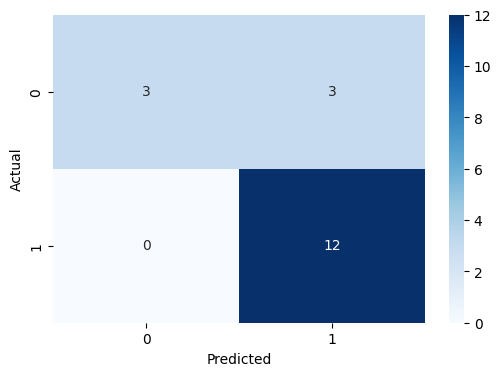

In [41]:
# Calculate test accuracy
test_accuracy = logreg_cv.score(X_test, Y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Make predictions
yhat = logreg_cv.predict(X_test)

# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test, yhat)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


Lets look at the confusion matrix:


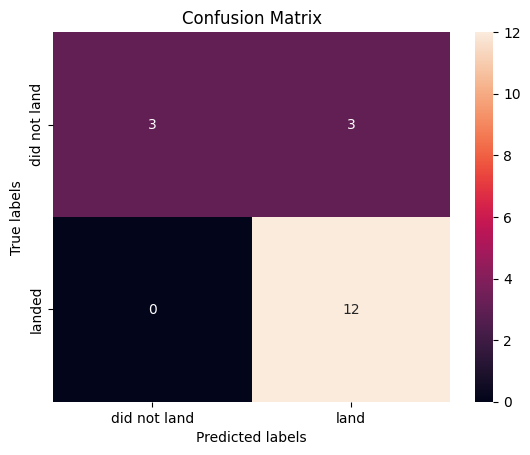

In [40]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [44]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [45]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Create GridSearchCV with cv=10
svm_cv = GridSearchCV(svm, parameters, cv=10, scoring='accuracy')
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')},
             scoring='accuracy')

In [46]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [47]:
# Calculate test accuracy
svm_test_accuracy = svm_cv.score(X_test, Y_test)
print(f"SVM Test Accuracy: {svm_test_accuracy:.4f}")

SVM Test Accuracy: 0.8333


We can plot the confusion matrix


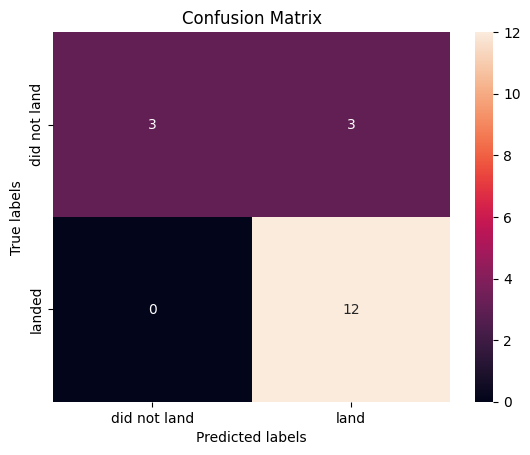

In [48]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [73]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [74]:

# Create GridSearchCV with cv=10
tree_cv = GridSearchCV(tree, parameters, cv=10, scoring='accuracy')
tree_cv.fit(X_train, Y_train)

/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/lib/python3.12/site-packages/sklearn/utils/_param_validation.py", line 95, in validate_p

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [75]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
accuracy : 0.8767857142857143


In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Create decision tree object with explicit max_features
tree = DecisionTreeClassifier(random_state=2, max_features='sqrt')

# Define parameter grid with valid max_features values
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2', None]  # Valid values only
}

# Create GridSearchCV with cv=10 and error handling
tree_cv = GridSearchCV(
    tree, 
    parameters, 
    cv=10, 
    scoring='accuracy',
    error_score='raise'  # This will show specific errors if any
)

tree_cv.fit(X_train, Y_train)

# Show best parameters and score
print("Best parameters:", tree_cv.best_params_)
print("Best score: {:.4f}".format(tree_cv.best_score_))

Best parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 10}
Best score: 0.8375


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [62]:
# Calculate test accuracy
tree_test_accuracy = tree_cv.score(X_test, Y_test)
print(f"Decision Tree Test Accuracy: {tree_test_accuracy:.4f}")

Decision Tree Test Accuracy: 0.7778


We can plot the confusion matrix


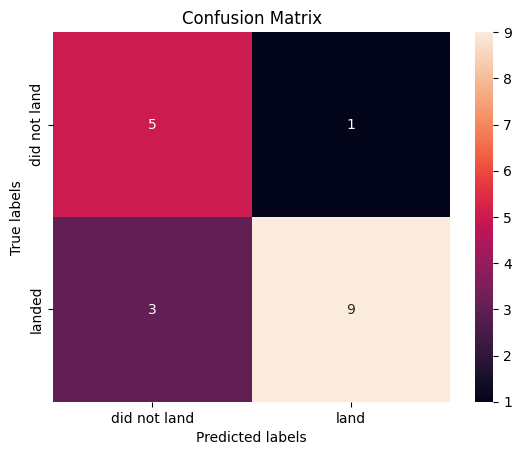

In [63]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [78]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.model_selection import GridSearchCV


In [79]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [81]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Create KNN object
knn = KNeighborsClassifier()

# Define parameter grid
parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]  # 1: Manhattan, 2: Euclidean
}

# Create GridSearchCV with cv=10 - FIXED THE TYPO
knn_cv = GridSearchCV(knn, parameters, cv=10, scoring='accuracy')
knn_cv.fit(X_train, Y_train)  # Changed Y_rain to Y_train

# Show best parameters and score
print("Best parameters:", knn_cv.best_params_)
print("Best score: {:.4f}".format(knn_cv.best_score_))

Best parameters: {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
Best score: 0.8482


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [82]:
# Calculate test accuracy
knn_test_accuracy = knn_cv.score(X_test, Y_test)
print(f"KNN Test Accuracy: {knn_test_accuracy:.4f}")

KNN Test Accuracy: 0.8333


We can plot the confusion matrix


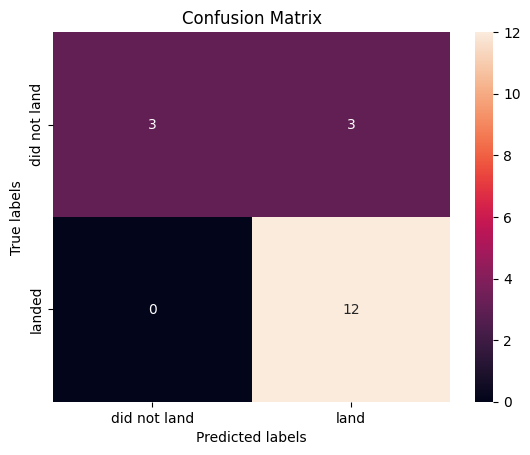

In [83]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  12


Find the method performs best:


In [84]:
# Compare all model test accuracies
print("MODEL PERFORMANCE COMPARISON:")
print("=" * 30)
print(f"Logistic Regression: {logreg_cv.score(X_test, Y_test):.4f}")
print(f"SVM: {svm_cv.score(X_test, Y_test):.4f}")
print(f"Decision Tree: {tree_cv.score(X_test, Y_test):.4f}")
print(f"KNN: {knn_cv.score(X_test, Y_test):.4f}")

# Find the best performing model
models = {
    'Logistic Regression': logreg_cv.score(X_test, Y_test),
    'SVM': svm_cv.score(X_test, Y_test),
    'Decision Tree': tree_cv.score(X_test, Y_test),
    'KNN': knn_cv.score(X_test, Y_test)
}

best_model = max(models, key=models.get)
best_accuracy = models[best_model]

print(f"\nBest performing model: {best_model} with accuracy: {best_accuracy:.4f}")

MODEL PERFORMANCE COMPARISON:
Logistic Regression: 0.8333
SVM: 0.8333
Decision Tree: 0.7222
KNN: 0.8333

Best performing model: Logistic Regression with accuracy: 0.8333


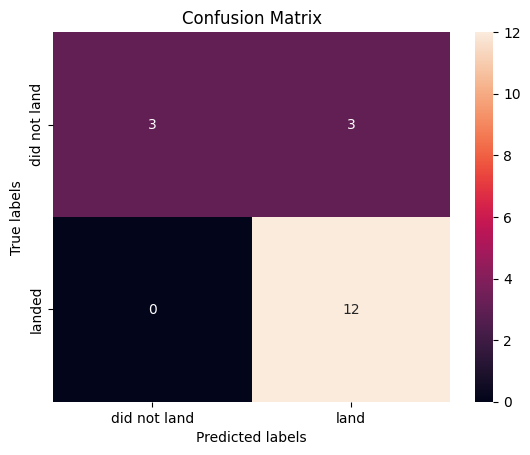

In [85]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

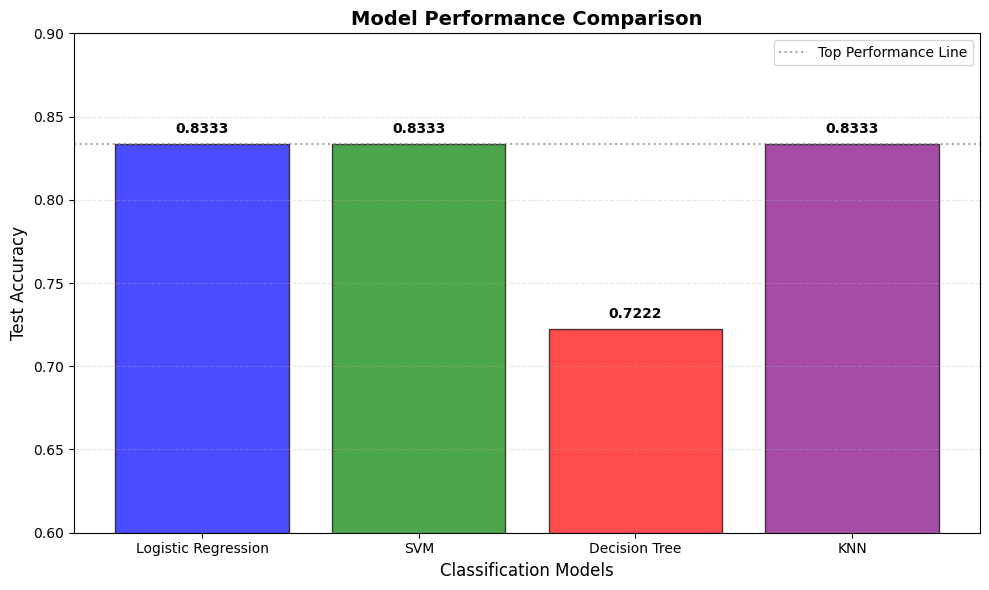

In [86]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and their accuracies
models = ['Logistic Regression', 'SVM', 'Decision Tree', 'KNN']
accuracies = [0.8333, 0.8333, 0.7222, 0.8333]
colors = ['blue', 'green', 'red', 'purple']

# Create bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=colors, alpha=0.7, edgecolor='black')

# Add value labels on top of each bar
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
             f'{accuracy:.4f}', ha='center', va='bottom', fontweight='bold')

# Customize the chart
plt.title('Model Performance Comparison', fontsize=14, fontweight='bold')
plt.xlabel('Classification Models', fontsize=12)
plt.ylabel('Test Accuracy', fontsize=12)
plt.ylim(0.6, 0.9)  # Set y-axis limits to better visualize differences
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Highlight the best performers
plt.axhline(y=0.8333, color='gray', linestyle=':', alpha=0.7, label='Top Performance Line')

plt.legend()
plt.tight_layout()
plt.show()

## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
